In [1]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

In [2]:
'''
states :-

Madhya Pradesh
Uttar Pradesh
Jharkhand
Bihar
Rajasthan

'''

vars = ["prim_Girls", "prim_Boys", "prim_Overall", "upPrim_Girls", "upPrim_Boys", "upPrim_Overall", "snr_Girls", "snr_Boys", "snr_Overall"]

cats = ["General", "SC", "ST", "OBC", "Overall"]

# state = "Gujarat"

var = vars[0]
cat = cats[4]

In [3]:
df = pd.read_csv("D:\projects\DropWrap\BackEnd\Test\ModelTesting\cluster.ipynb")

FileNotFoundError: [Errno 2] No such file or directory: 'DATA\\Test\\stateWiseData\\states.csv'

In [13]:
df

,Location,Social Category,prim_Girls,prim_Boys,prim_Overall,upPrim_Girls,upPrim_Boys,upPrim_Overall,snr_Girls,snr_Boys,snr_Overall
0,AHMEDABAD,General,0.00,0.00,0.00,0.00,0.00,0.00,8.00,8.51,8.28
1,AHMEDABAD,OBC,0.00,0.00,0.00,7.17,4.03,5.49,17.23,20.13,18.96
2,AHMEDABAD,SC,0.00,0.00,0.00,0.00,0.00,0.00,9.89,14.03,12.21
3,AHMEDABAD,ST,0.00,0.00,0.00,17.65,15.37,16.39,29.30,25.31,27.06
4,AHMEDABAD,Overall,0.00,0.00,0.00,2.71,0.60,1.58,11.98,14.10,13.19
...,...,...,...,...,...,...,...,...,...,...,...
160,VALSAD,General,0.00,0.00,0.00,2.27,1.64,1.92,10.61,13.72,12.33
161,VALSAD,OBC,2.75,1.03,1.85,3.27,4.36,3.85,3.12,6.87,5.13
162,VALSAD,SC,10.80,11.36,11.10,22.43,17.45,19.80,16.08,26.68,21.75
163,VALSAD,ST,0.89,1.00,0.94,5.25,4.38,4.81,14.26,17.35,15.81


In [14]:
colName = var
locations = df['Location']
caste = df['Social Category']

In [15]:
locations

0      AHMEDABAD
1      AHMEDABAD
2      AHMEDABAD
3      AHMEDABAD
4      AHMEDABAD
         ...    
160       VALSAD
161       VALSAD
162       VALSAD
163       VALSAD
164       VALSAD
Name: Location, Length: 165, dtype: object

In [16]:
caste

0      General
1          OBC
2           SC
3           ST
4      Overall
        ...   
160    General
161        OBC
162         SC
163         ST
164    Overall
Name: Social Category, Length: 165, dtype: object

In [17]:
genData = df[df["Social Category"] == cat]

In [18]:
genData

,Location,Social Category,prim_Girls,prim_Boys,prim_Overall,upPrim_Girls,upPrim_Boys,upPrim_Overall,snr_Girls,snr_Boys,snr_Overall
4,AHMEDABAD,Overall,0.00,0.00,0.00,2.71,0.60,1.58,11.98,14.10,13.19
9,AMRELI,Overall,0.00,0.00,0.00,4.56,4.33,4.44,18.25,21.39,20.00
14,ANAND,Overall,0.00,0.00,0.00,3.52,0.30,1.82,20.10,23.29,21.94
19,ARAVALLI,Overall,0.00,0.00,0.00,2.08,1.78,1.92,14.54,18.74,16.83
24,BANAS KANTHA,Overall,0.11,0.00,0.00,10.99,6.42,8.56,19.84,19.53,19.65
29,BHARUCH,Overall,0.00,0.01,0.00,3.56,3.17,3.36,16.88,28.10,22.95
34,BHAVNAGAR,Overall,0.00,0.00,0.00,5.60,4.55,5.04,14.05,16.63,15.49
39,BOTAD,Overall,0.00,0.00,0.00,6.93,1.70,4.10,23.81,18.72,20.78
44,CHHOTAUDEPUR,Overall,0.61,0.38,0.49,8.71,7.69,8.18,13.96,16.53,15.32
49,DEVBHOOMI DWARKA,Overall,0.24,0.09,0.16,6.30,5.59,5.93,24.25,28.59,26.68


In [19]:
data = genData[["Location", var]]

In [20]:
df = pd.DataFrame(data)
df['serialNumber'] = list(range(1, len(df)+1))

In [21]:
df

,Location,prim_Girls,serialNumber
4,AHMEDABAD,0.00,1
9,AMRELI,0.00,2
14,ANAND,0.00,3
19,ARAVALLI,0.00,4
24,BANAS KANTHA,0.11,5
29,BHARUCH,0.00,6
34,BHAVNAGAR,0.00,7
39,BOTAD,0.00,8
44,CHHOTAUDEPUR,0.61,9
49,DEVBHOOMI DWARKA,0.24,10


In [22]:
newData = df[[var, "serialNumber"]]

In [23]:
newData

,prim_Girls,serialNumber
4,0.00,1
9,0.00,2
14,0.00,3
19,0.00,4
24,0.11,5
29,0.00,6
34,0.00,7
39,0.00,8
44,0.61,9
49,0.24,10


In [24]:
dataLinkage = linkage(newData.values.reshape(-1,1), "ward")

In [25]:
dataLinkage

array([[0.00000000e+00, 2.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+00, 5.00000000e+01, 0.00000000e+00, 2.00000000e+00],
       [4.00000000e+00, 6.60000000e+01, 0.00000000e+00, 3.00000000e+00],
       [6.00000000e+00, 6.80000000e+01, 0.00000000e+00, 4.00000000e+00],
       [1.00000000e+01, 6.90000000e+01, 0.00000000e+00, 5.00000000e+00],
       [8.00000000e+00, 2.60000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.20000000e+01, 7.00000000e+01, 0.00000000e+00, 6.00000000e+00],
       [1.40000000e+01, 7.20000000e+01, 0.00000000e+00, 7.00000000e+00],
       [2.40000000e+01, 7.30000000e+01, 0.00000000e+00, 8.00000000e+00],
       [3.20000000e+01, 7.40000000e+01, 0.00000000e+00, 9.00000000e+00],
       [3.40000000e+01, 7.50000000e+01, 0.00000000e+00, 1.00000000e+01],
       [3.60000000e+01, 7.60000000e+01, 0.00000000e+00, 1.10000000e+01],
       [4.40000000e+01, 7.70000000e+01, 0.00000000e+00, 1.20000000e+01],
       [4.80000000e+01, 7.80000000e+01, 0.00000000e

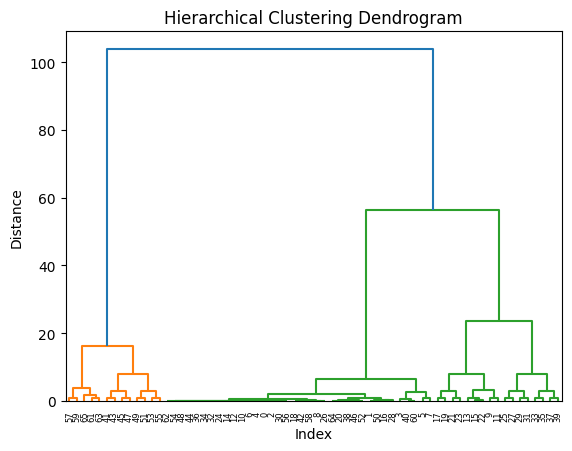

In [26]:
dendrogram(dataLinkage)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import seaborn as sns
import os

In [28]:
df = pd.DataFrame(newData)
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = clustering.fit_predict(df)
newData['Cluster'] = clusters

In [29]:
dirPath = "D:\\projects\\DropWrap\\BackEnd\\Test\\ModelTesting\\outputData\\" + state + "\\" + cat

if  not os.path.exists(dirPath):
    os.mkdir(path=dirPath)

filePath = dirPath + "\\"  + "\\" + var + ".csv"


if os.path.exists(filePath):
    os.remove(filePath)
    # newData.to_csv(filePath)
newData.to_csv(filePath)

In [30]:
newData

,prim_Girls,serialNumber,Cluster
4,0.00,1,0
9,0.00,2,0
14,0.00,3,0
19,0.00,4,0
24,0.11,5,0
29,0.00,6,0
34,0.00,7,0
39,0.00,8,0
44,0.61,9,0
49,0.24,10,0


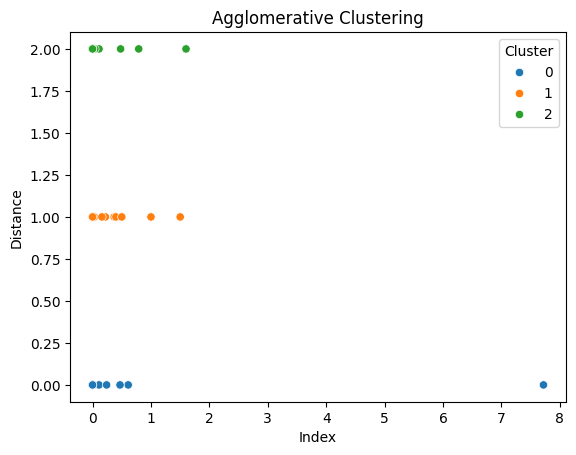

In [31]:
sns.scatterplot(data=newData, x=var, y='Cluster', hue='Cluster', palette='tab10')
plt.title('Agglomerative Clustering')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

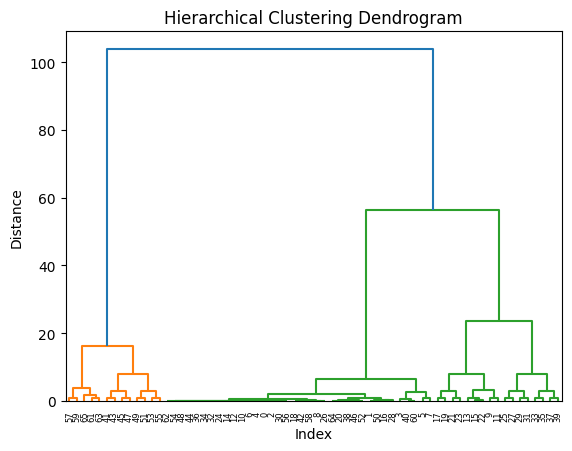

In [32]:
dendrogram(dataLinkage)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()